![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
# !pip install -r requirements.txt

In [2]:
# Ignorar advertencias de librerías
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Importación librerías
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, Ridge 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt

In [4]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [5]:
df.shape

(541462, 3)

<Axes: >

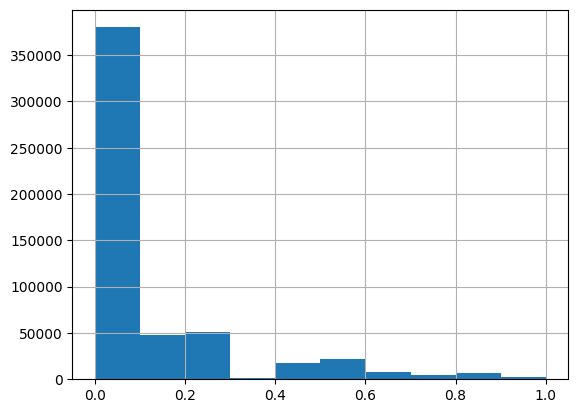

In [6]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [7]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
# Convertir el target continuo a binario con umbral 0.5
y_train_bin = (y_train >= 0.5).astype(int)
y_test_bin = (y_test >= 0.5).astype(int)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### Función TfidfVectorizer
##### Concepto
Es una técnica de Tokenización y representación de texto que transforma un texto en una matriz de valores numéricos, basados en el cálculo de: 
* Term Frequency (TF): Frecuencia de una palabra 
* Inverse Document Frequency (IDF): Frecuencia inversa, qué tan rara es una palabra en todo el texto.
* Producto cruzado de las frecuencias: TF-IDF: Importancia de una palabra en un texto, relativa a su presencia en el corpus completo
##### Comparado contra 'CountVectorizer'
* Tiene relevancia semántica: distingue mejor la importancia de relativa de las palabras
* Permite análisis más profundos de las palabras
* Permite trabajar en grupos desbalanceados (textos con altas repeticiones de palabras)
* Es especialmente útil para modelos de clasificación de texto

In [31]:
#Celda 3
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9)
# Ajustar y transformar el texto de entrenamiento
X_train_tfidf = tfidf.fit_transform(X_train)
# Transformar el texto de prueba (sin ajustar)
X_test_tfidf = tfidf.transform(X_test)
# Mostrar el tamaño de la matriz resultante
print("Tamaño del set de entrenamiento (TF-IDF):", X_train_tfidf.shape)

Tamaño del set de entrenamiento (TF-IDF): (362779, 140862)


In [17]:
# Transformación de la variable de interés (y) a binaria
y_train_bin = (y_train >= 0.5).astype(int)
y_test_bin = (y_test >= 0.5).astype(int)

# Modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_tfidf, y_train_bin)

# Predicciones
y_pred = modelo.predict(X_test_tfidf)
y_proba = modelo.predict_proba(X_test_tfidf)[:, 1]

# Evaluación del modelo
print(" Reporte de clasificación:\n")
print(metrics.classification_report(y_test_bin, y_pred))
print("AUC (Área bajo la curva ROC):", metrics.roc_auc_score(y_test_bin, y_proba))


 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    164268
           1       0.80      0.39      0.52     14415

    accuracy                           0.94    178683
   macro avg       0.87      0.69      0.75    178683
weighted avg       0.94      0.94      0.93    178683

AUC (Área bajo la curva ROC): 0.9347591023242722


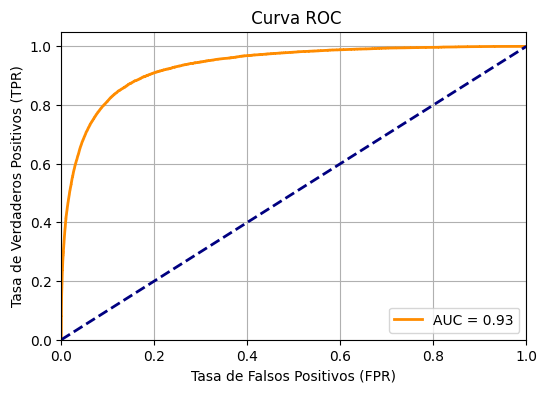

In [22]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title(' Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()


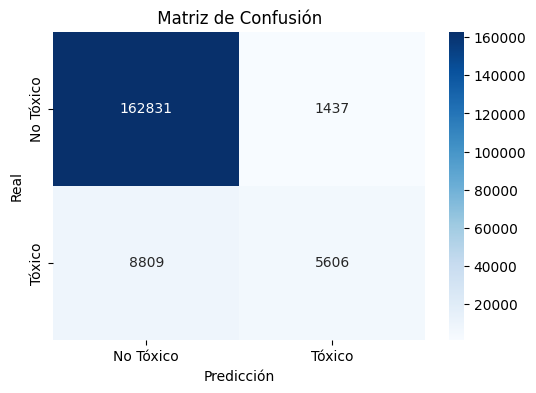

In [25]:
# Matriz de confusión
cm = confusion_matrix(y_test_bin, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tóxico', 'Tóxico'], yticklabels=['No Tóxico', 'Tóxico'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title(' Matriz de Confusión ')
plt.show()


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [28]:
# Celda 4
# Vectorización del texto con TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)  # importante: solo transform en test

# Entrenamiento del modelo de regresión (Ridge recomendado para regularización)
modelo_regresion = Ridge()
modelo_regresion.fit(X_train_tfidf, y_train)

# Predicciones
y_pred_regresion = modelo_regresion.predict(X_test_tfidf)

# Evaluación con MSE
mse = mean_squared_error(y_test, y_pred_regresion)
print(f" MSE : {mse:.4f}")


 MSE : 0.0192


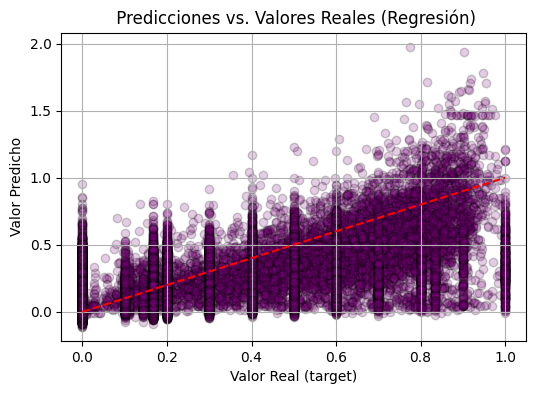

In [30]:
# Gráfica de dispersión: valores reales vs. predichos
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_regresion, alpha=0.2, color='purple', edgecolors='k')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Valor Real (target)')
plt.ylabel('Valor Predicho')
plt.title(' Predicciones vs. Valores Reales (Regresión)')
plt.grid()
plt.show()


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [ ]:
# Celda 5 Código para graficos y tablas comparativas


In [ ]:
### Punto 5.1 - Comparación y análisis de resultados
